In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from sklearn.preprocessing import LabelEncoder

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터/test.csv')

In [4]:
train['label'] = 'train'
test['label'] = 'test'

In [5]:
df = pd.concat([train,test])
df

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원),label
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66,train
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01,train
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27,train
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16,train
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02,train
...,...,...,...,...,...,...,...,...,...,...,...,...
841,TEST_841,P사,TayGTS,Pre-Owned,64.683,AWD,117298,2,No,0,NaN,test
842,TEST_842,V사,ID4,Pre-Owned,55.547,AWD,72308,0,No,0,NaN,test
843,TEST_843,V사,ID4,Pre-Owned,55.547,AWD,124537,0,No,0,NaN,test
844,TEST_844,A사,Q4eT,Nearly New,69.646,AWD,15629,4,No,0,NaN,test


In [6]:
import warnings
import matplotlib.pyplot as plt
import matplotlib

# 모든 matplotlib 경고 무시
warnings.filterwarnings('ignore')
matplotlib.rcParams['axes.unicode_minus'] = False

# 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 폰트 캐시 초기화
!rm ~/.cache/matplotlib -rf
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rc('font', family='NanumGothic')

# 추가적인 경고 메시지 비활성화
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123634 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

<Axes: >

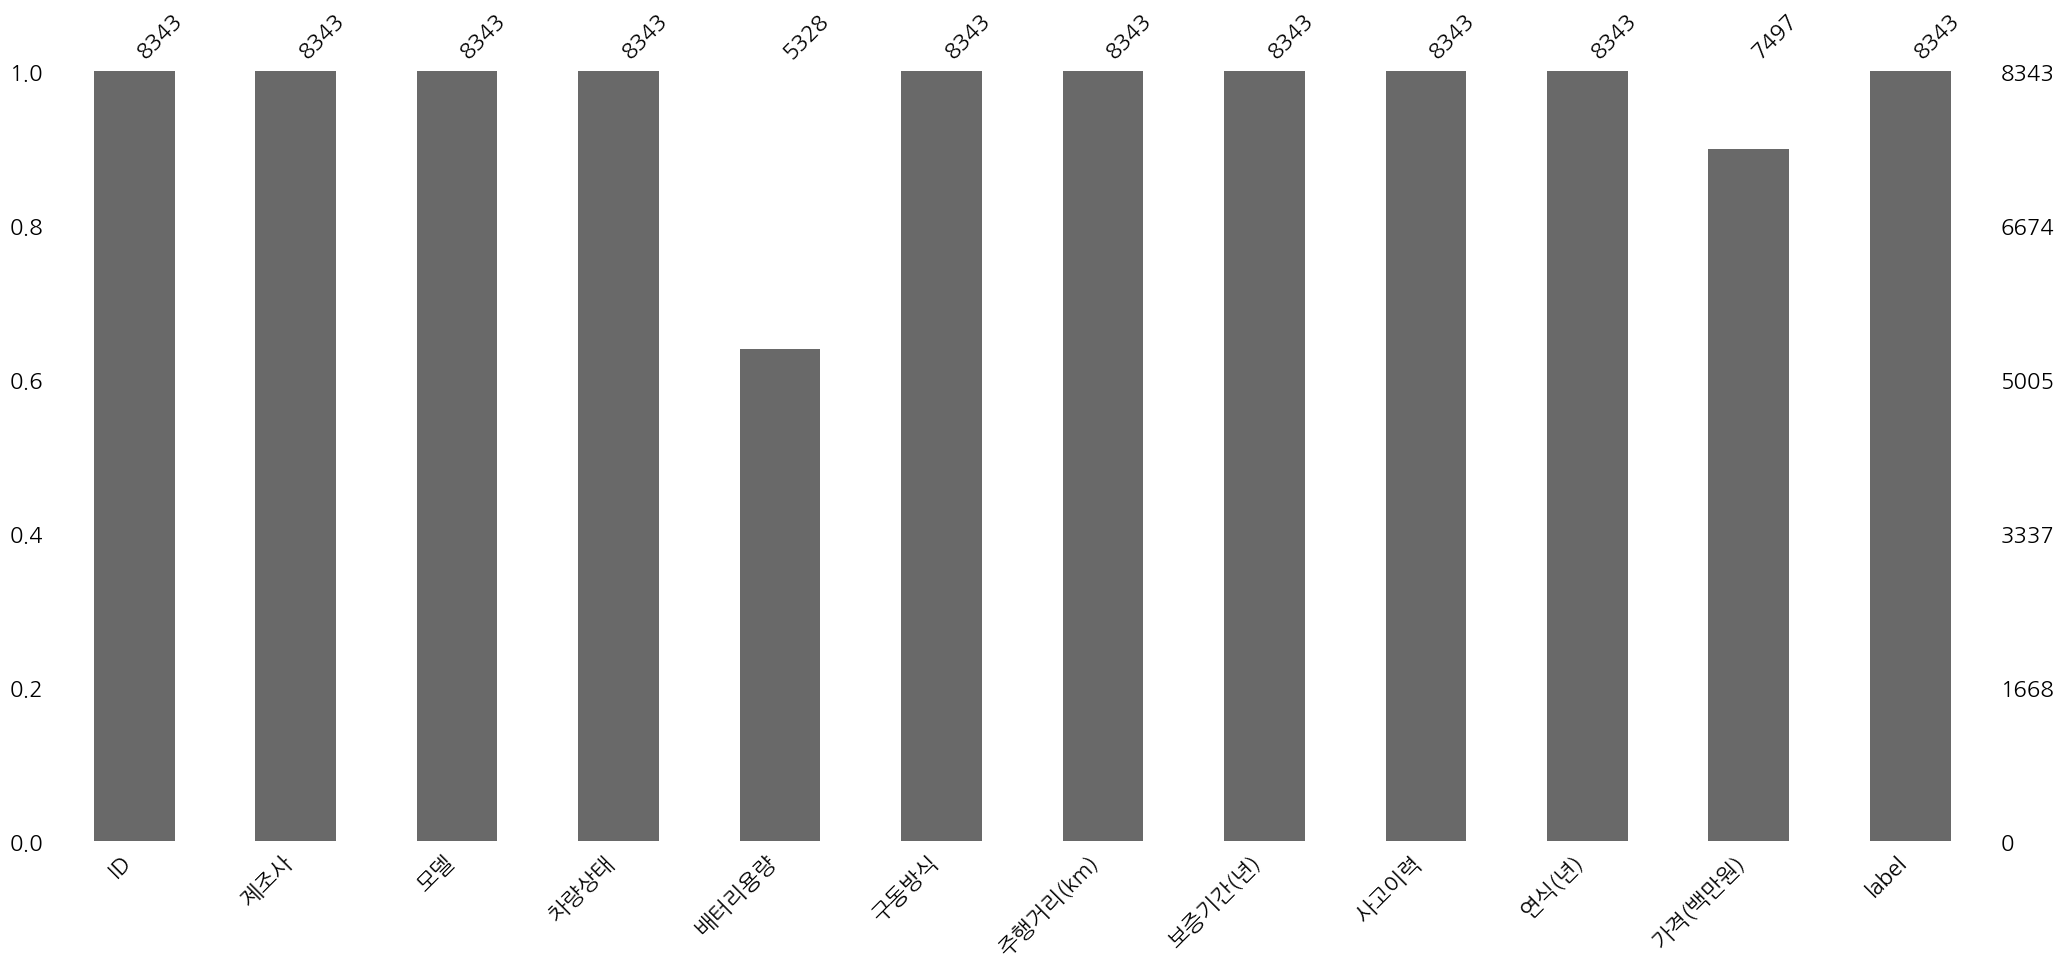

In [7]:
msno.bar(df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8343 entries, 0 to 845
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        8343 non-null   object 
 1   제조사       8343 non-null   object 
 2   모델        8343 non-null   object 
 3   차량상태      8343 non-null   object 
 4   배터리용량     5328 non-null   float64
 5   구동방식      8343 non-null   object 
 6   주행거리(km)  8343 non-null   int64  
 7   보증기간(년)   8343 non-null   int64  
 8   사고이력      8343 non-null   object 
 9   연식(년)     8343 non-null   int64  
 10  가격(백만원)   7497 non-null   float64
 11  label     8343 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 847.3+ KB


In [9]:
object_col = df.drop('ID',axis=1).select_dtypes('object')
for i in list(object_col.columns):
  print(df[i].value_counts())

제조사
H사    1377
B사    1300
K사    1296
A사    1271
T사    1234
P사    1192
V사     673
Name: count, dtype: int64
모델
ID4       673
i5        460
Niro      443
Soul      442
i3        432
RSeTGT    428
eT        422
ION6      422
Q4eT      421
TayGTS    417
EV6       411
iX        408
KNE       406
Tay       402
ION5      393
TayCT     373
MY        322
M3        310
MS        308
MX        294
IONIQ     156
Name: count, dtype: int64
차량상태
Brand New     3758
Nearly New    2294
Pre-Owned     2291
Name: count, dtype: int64
구동방식
AWD    5747
FWD    1411
RWD    1185
Name: count, dtype: int64
사고이력
No     7952
Yes     391
Name: count, dtype: int64
label
train    7497
test      846
Name: count, dtype: int64


In [10]:
object_col = df.drop('ID', axis=1).select_dtypes('object')
for i in list(object_col.columns):
    print(f'train {i} : {sorted(train[i].unique())}')
    print(f'test {i} : {sorted(test[i].unique())}')
    print('')

train 제조사 : ['A사', 'B사', 'H사', 'K사', 'P사', 'T사', 'V사']
test 제조사 : ['A사', 'B사', 'H사', 'K사', 'P사', 'T사', 'V사']

train 모델 : ['EV6', 'ID4', 'ION5', 'ION6', 'IONIQ', 'KNE', 'M3', 'MS', 'MX', 'MY', 'Niro', 'Q4eT', 'RSeTGT', 'Soul', 'Tay', 'TayCT', 'TayGTS', 'eT', 'i3', 'i5', 'iX']
test 모델 : ['EV6', 'ID4', 'ION5', 'ION6', 'IONIQ', 'KNE', 'M3', 'MS', 'MX', 'MY', 'Niro', 'Q4eT', 'RSeTGT', 'Soul', 'Tay', 'TayCT', 'TayGTS', 'eT', 'i3', 'i5', 'iX']

train 차량상태 : ['Brand New', 'Nearly New', 'Pre-Owned']
test 차량상태 : ['Brand New', 'Nearly New', 'Pre-Owned']

train 구동방식 : ['AWD', 'FWD', 'RWD']
test 구동방식 : ['AWD', 'FWD', 'RWD']

train 사고이력 : ['No', 'Yes']
test 사고이력 : ['No', 'Yes']

train label : ['train']
test label : ['test']



가격 최대값:  161.09
가격 최소값:  9.0


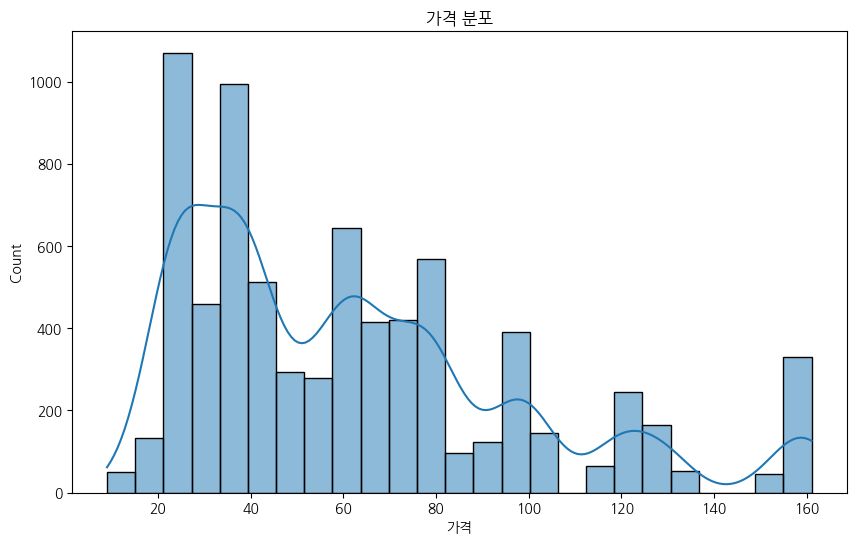

In [11]:
print('가격 최대값: ',train['가격(백만원)'].max())
print('가격 최소값: ',train['가격(백만원)'].min())
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='가격(백만원)', kde=True, bins=25)


plt.xlabel('가격')
plt.title('가격 분포')
plt.show()

배터리용량 최대값:  99.8
배터리용량 최소값:  46.0


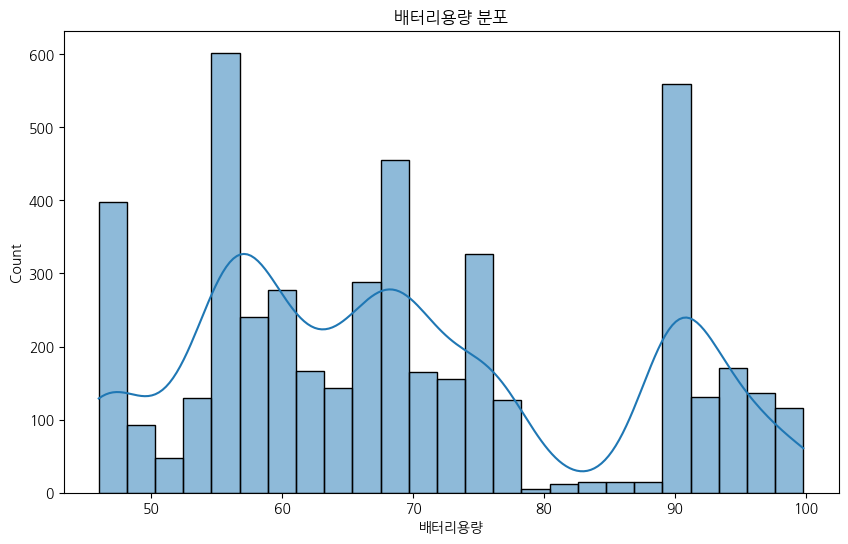

In [12]:
print('배터리용량 최대값: ',train['배터리용량'].max())
print('배터리용량 최소값: ',train['배터리용량'].min())
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='배터리용량', kde=True, bins=25)

plt.xlabel('배터리용량')
plt.title('배터리용량 분포')
plt.show()

주행거리 최대값:  199827
주행거리 최소값:  3


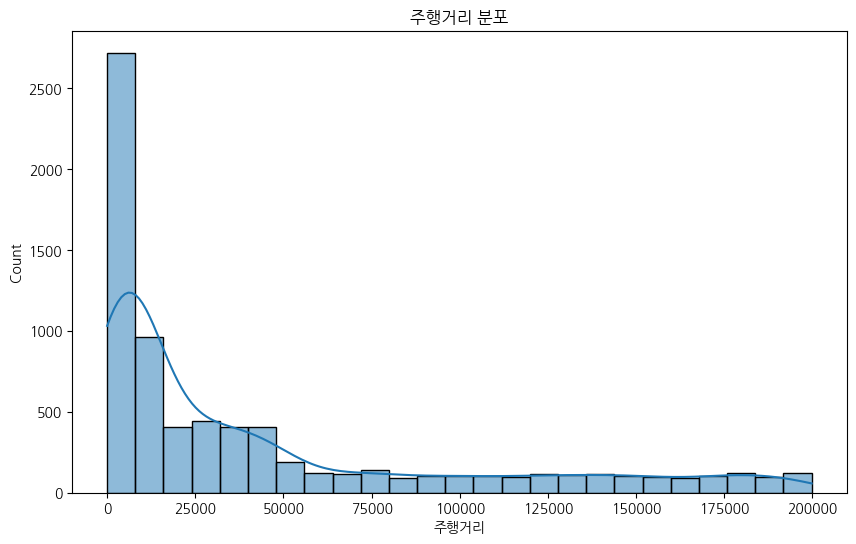

In [13]:
print('주행거리 최대값: ',train['주행거리(km)'].max())
print('주행거리 최소값: ',train['주행거리(km)'].min())
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='주행거리(km)', kde=True, bins=25)

plt.xlabel('주행거리')
plt.title('주행거리 분포')
plt.show()

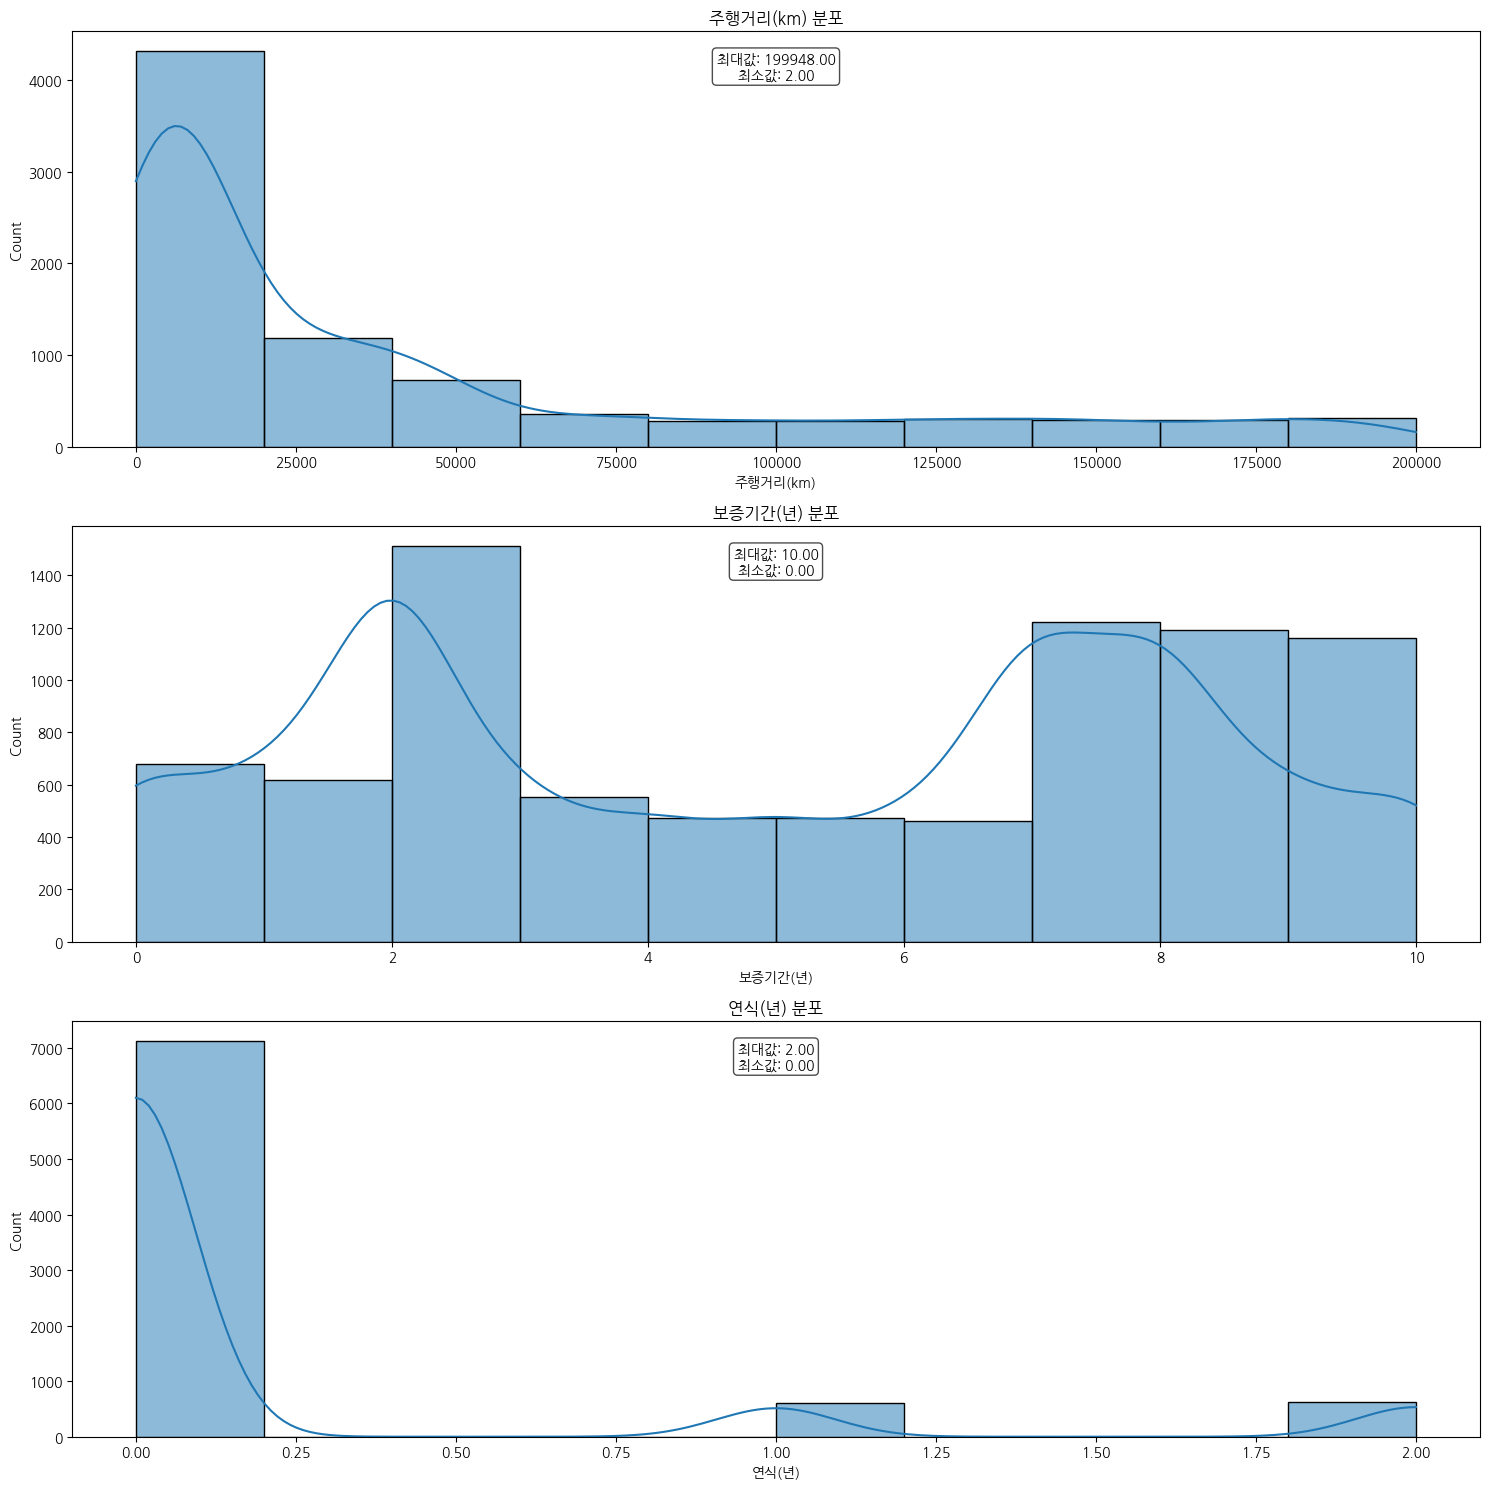

In [14]:
col = ['주행거리(km)', '보증기간(년)', '연식(년)']

fig, axes = plt.subplots(3, 1, figsize=(15, 15))

for idx, i in enumerate(col):
    max_val = df[i].max()
    min_val = df[i].min()

    sns.histplot(data=df, x=i, kde=True, bins=10, ax=axes[idx])
    axes[idx].set_xlabel(f'{i}')
    axes[idx].set_title(f'{i} 분포')

    axes[idx].text(0.5, 0.95, f'최대값: {max_val:.2f}\n최소값: {min_val:.2f}',
                   transform=axes[idx].transAxes,
                   horizontalalignment='center',
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

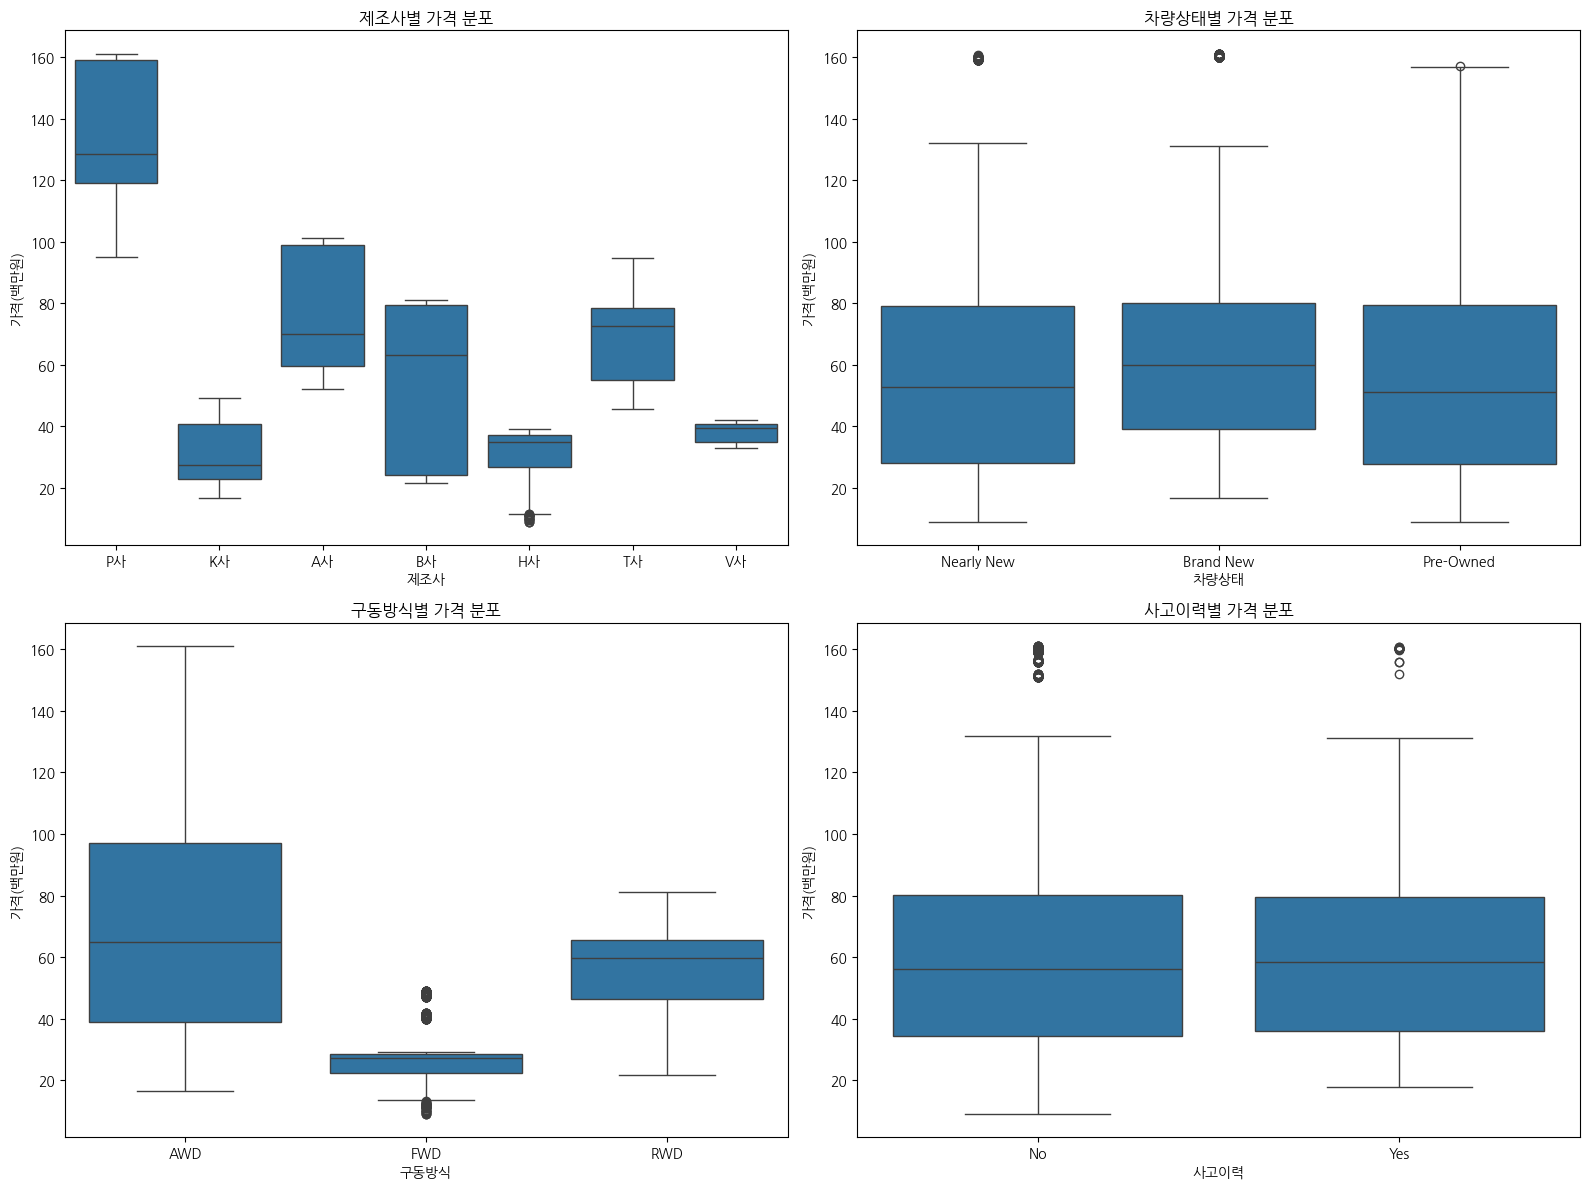

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.boxplot(data=train, x="제조사", y="가격(백만원)", ax=axes[0, 0])
axes[0, 0].set_title("제조사별 가격 분포")

sns.boxplot(data=train, x="차량상태", y="가격(백만원)", ax=axes[0, 1])
axes[0, 1].set_title("차량상태별 가격 분포")

sns.boxplot(data=train, x="구동방식", y="가격(백만원)", ax=axes[1, 0])
axes[1, 0].set_title("구동방식별 가격 분포")

sns.boxplot(data=train, x="사고이력", y="가격(백만원)", ax=axes[1, 1])
axes[1, 1].set_title("사고이력별 가격 분포")

plt.tight_layout()
plt.show()

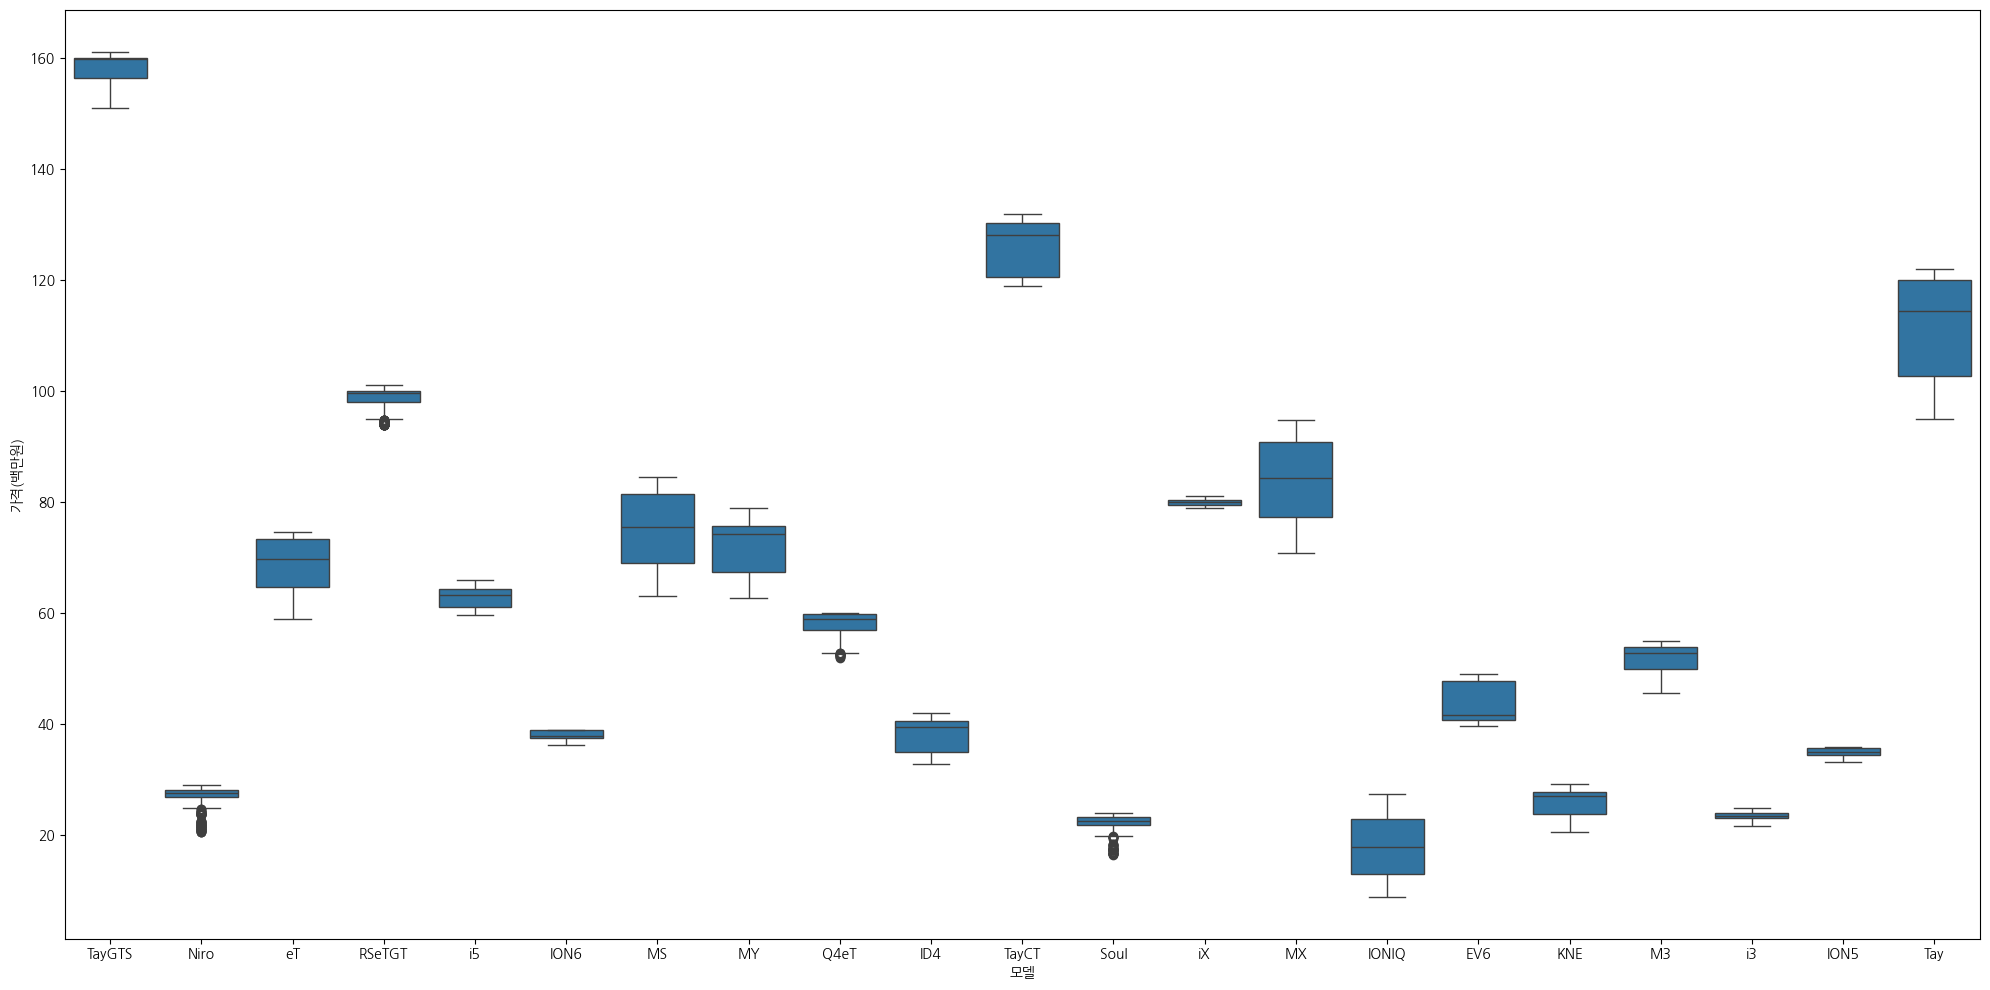

In [16]:
plt.figure(figsize=(20,10))
sns.boxplot(data=train, x="모델", y="가격(백만원)")
plt.tight_layout()
plt.show()

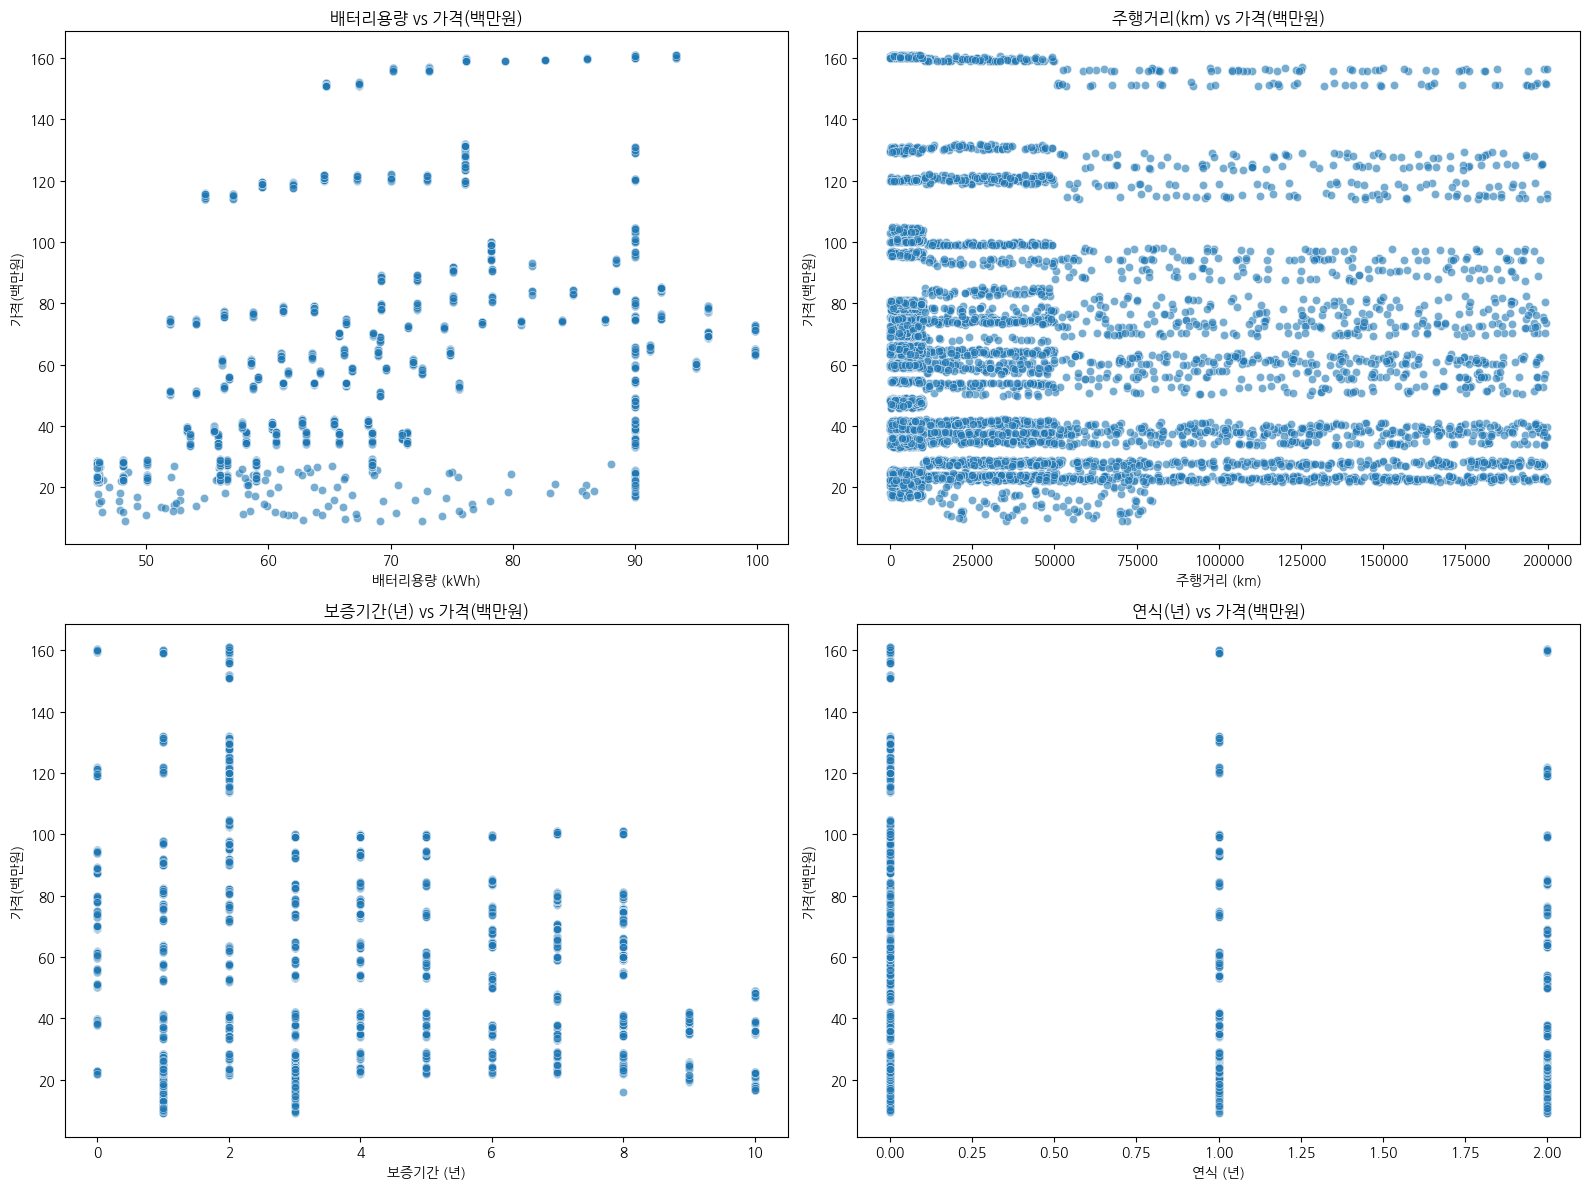

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.scatterplot(data=train, x="배터리용량", y="가격(백만원)", ax=axes[0, 0], alpha=0.6)
axes[0, 0].set_title("배터리용량 vs 가격(백만원)")
axes[0, 0].set_xlabel("배터리용량 (kWh)")

sns.scatterplot(data=train, x="주행거리(km)", y="가격(백만원)", ax=axes[0, 1], alpha=0.6)
axes[0, 1].set_title("주행거리(km) vs 가격(백만원)")
axes[0, 1].set_xlabel("주행거리 (km)")

sns.scatterplot(data=train, x="보증기간(년)", y="가격(백만원)", ax=axes[1, 0], alpha=0.6)
axes[1, 0].set_title("보증기간(년) vs 가격(백만원)")
axes[1, 0].set_xlabel("보증기간 (년)")

sns.scatterplot(data=train, x="연식(년)", y="가격(백만원)", ax=axes[1, 1], alpha=0.6)
axes[1, 1].set_title("연식(년) vs 가격(백만원)")
axes[1, 1].set_xlabel("연식 (년)")

plt.tight_layout()
plt.show()

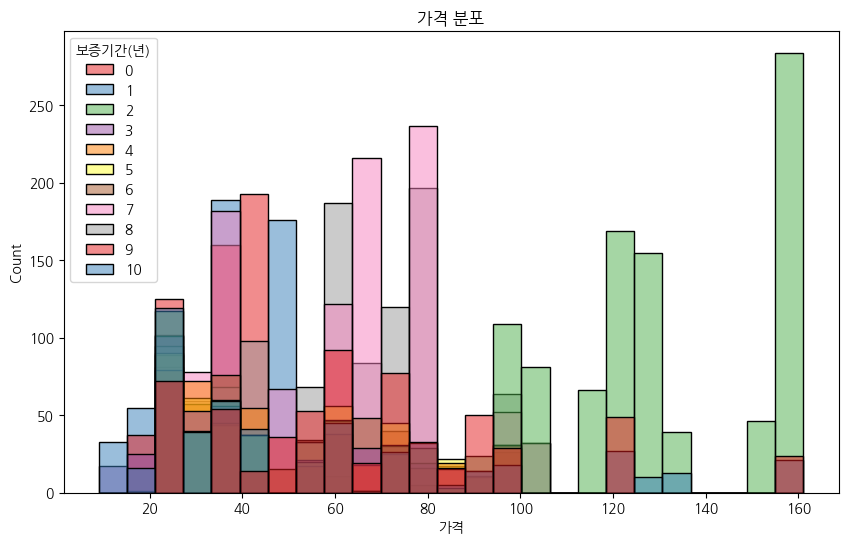

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='가격(백만원)',hue='보증기간(년)', kde=False, bins=25,palette='Set1')

plt.xlabel('가격')
plt.title('가격 분포')
plt.show()

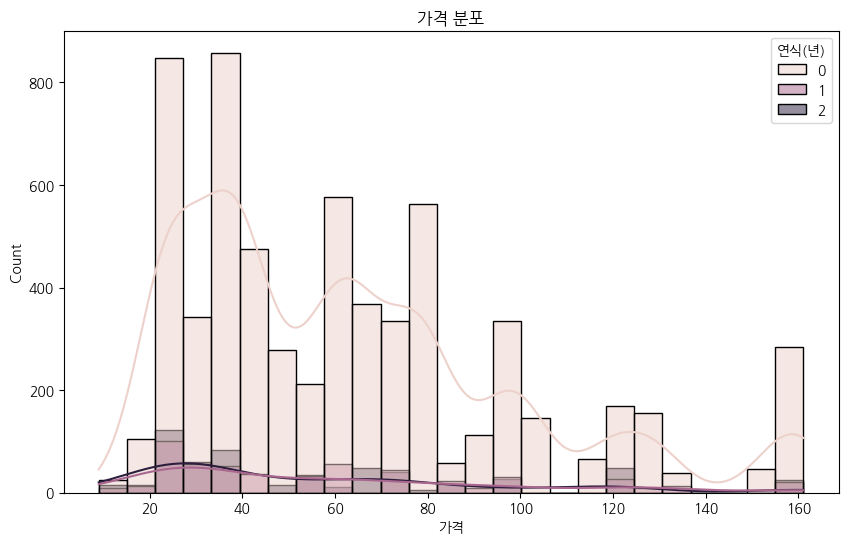

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='가격(백만원)',hue='연식(년)', kde=True, bins=25)

plt.xlabel('가격')
plt.title('가격 분포')
plt.show()

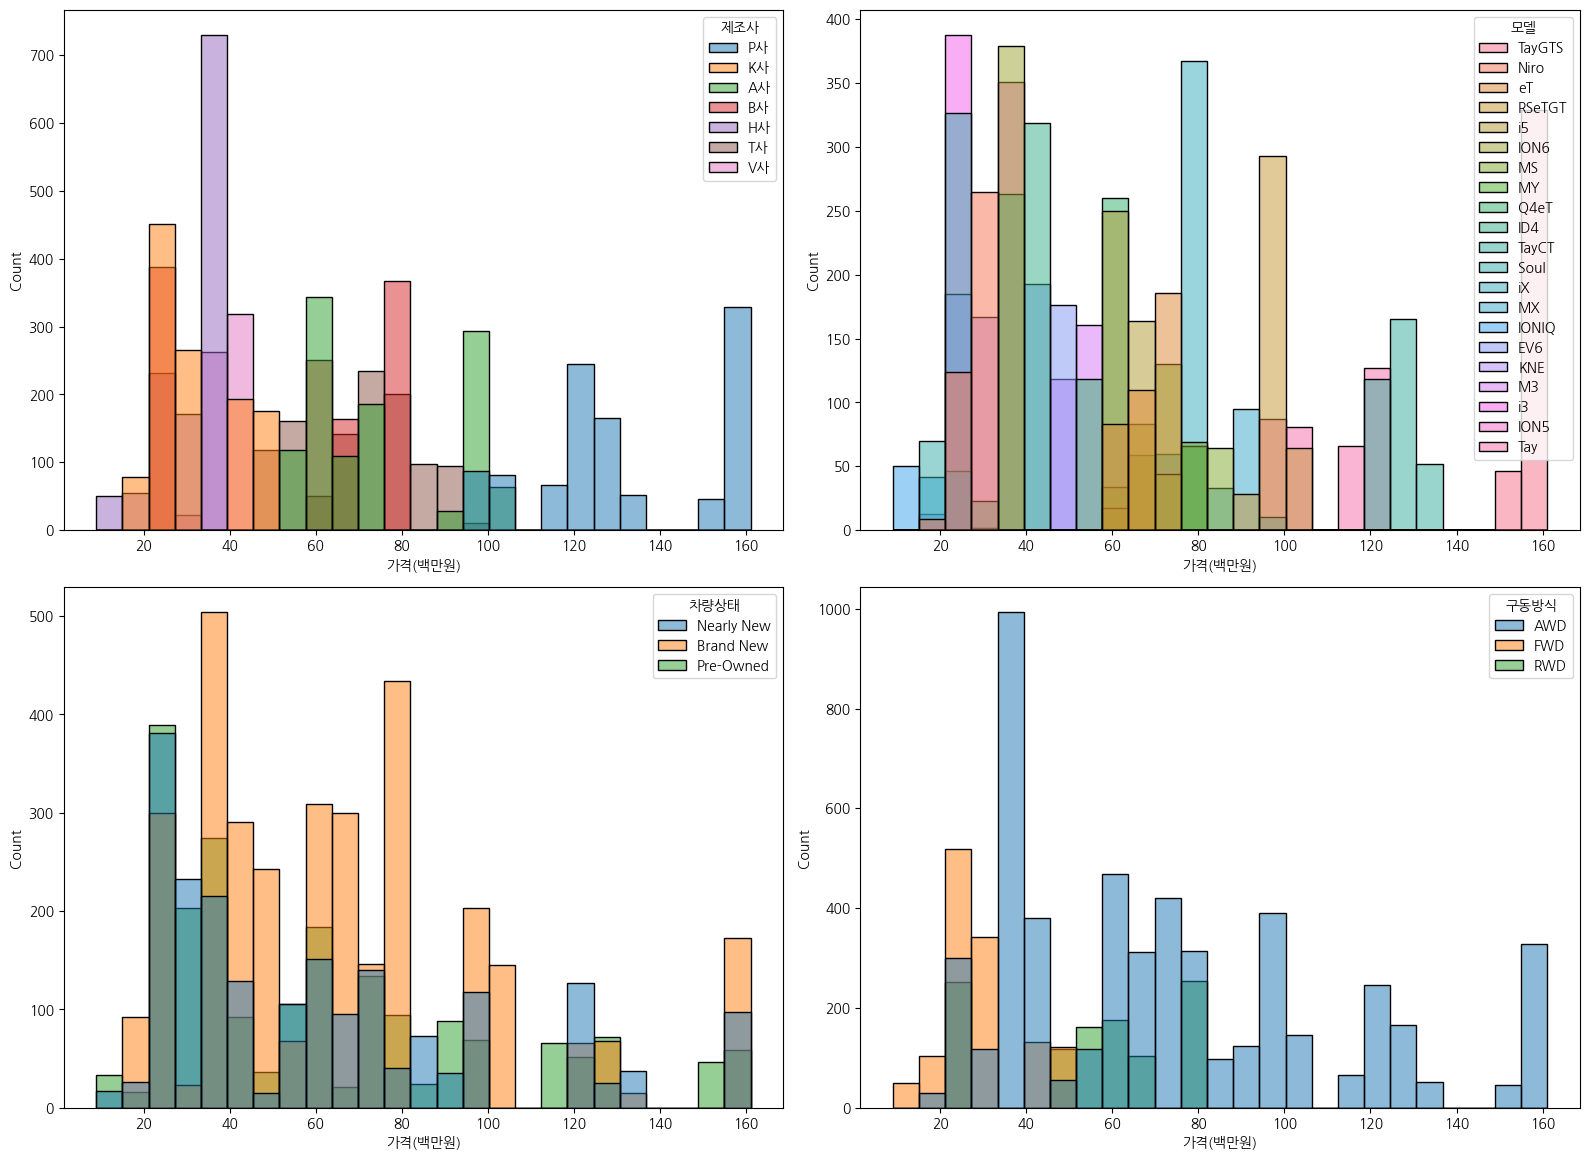

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.histplot(data=train, x='가격(백만원)',hue='제조사', kde=False, bins=25,ax=axes[0, 0])
sns.histplot(data=train, x='가격(백만원)',hue='모델', kde=False, bins=25,ax=axes[0, 1])
sns.histplot(data=train, x='가격(백만원)',hue='차량상태', kde=False, bins=25,ax=axes[1, 0])
sns.histplot(data=train, x='가격(백만원)',hue='구동방식', kde=False, bins=25,ax=axes[1, 1])


plt.tight_layout()
plt.show()

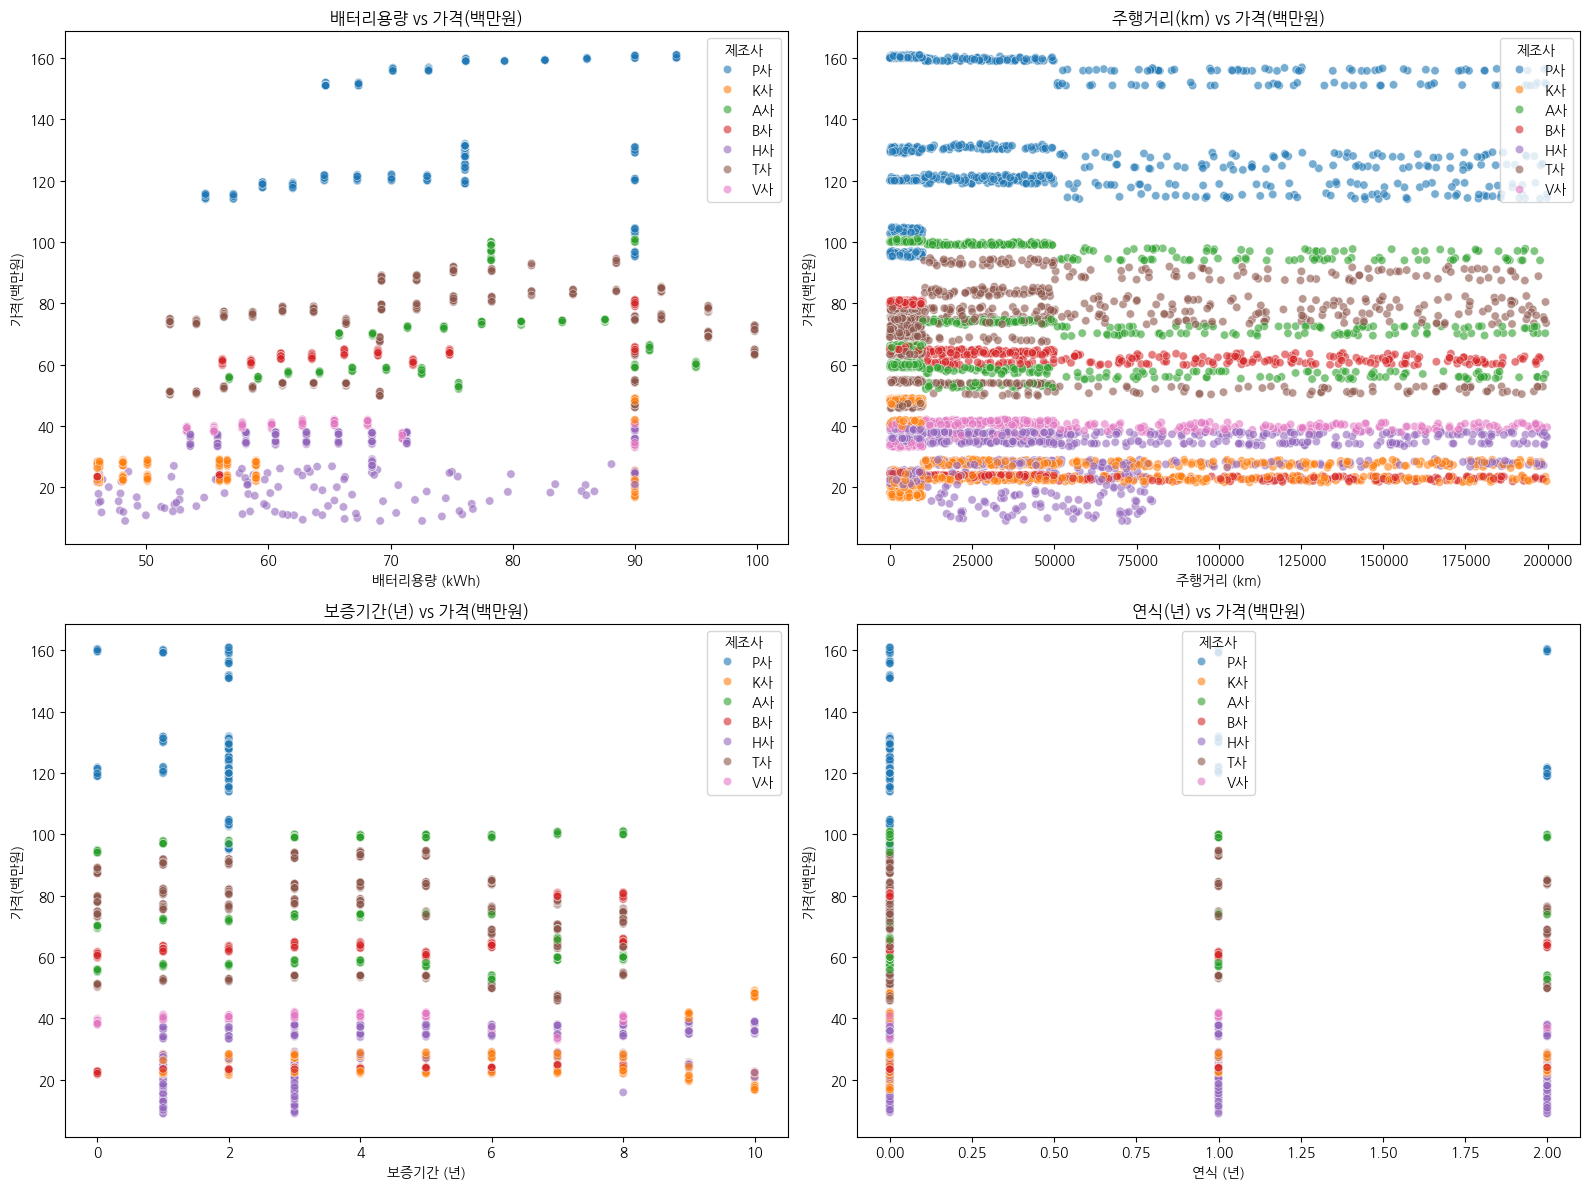

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.scatterplot(data=train, x="배터리용량", y="가격(백만원)",hue='제조사', ax=axes[0, 0], alpha=0.6)
axes[0, 0].set_title("배터리용량 vs 가격(백만원)")
axes[0, 0].set_xlabel("배터리용량 (kWh)")

sns.scatterplot(data=train, x="주행거리(km)", y="가격(백만원)",hue='제조사', ax=axes[0, 1], alpha=0.6)
axes[0, 1].set_title("주행거리(km) vs 가격(백만원)")
axes[0, 1].set_xlabel("주행거리 (km)")

sns.scatterplot(data=train, x="보증기간(년)", y="가격(백만원)",hue='제조사', ax=axes[1, 0], alpha=0.6)
axes[1, 0].set_title("보증기간(년) vs 가격(백만원)")
axes[1, 0].set_xlabel("보증기간 (년)")

sns.scatterplot(data=train, x="연식(년)", y="가격(백만원)",hue='제조사', ax=axes[1, 1], alpha=0.6)
axes[1, 1].set_title("연식(년) vs 가격(백만원)")
axes[1, 1].set_xlabel("연식 (년)")

plt.tight_layout()
plt.show()